<a href="https://colab.research.google.com/github/Srinivas26k/TrendPredictor-ML/blob/main/TrendPredictor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install pytrends pandas matplotlib

In [51]:
!pip install statsmodels

In [52]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)

In [55]:
kw_list = ["Artificial Intelligence"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
interest_over_time_df = pytrends.interest_over_time()

# # Save the DataFrame to a CSV file
# interest_over_time_df.to_csv('artificial_intelligence_trends.csv')

# print("Data saved to artificial_intelligence_trends.csv")

TooManyRequestsError: The request failed: Google returned a response with code 429

In [57]:
df = pd.read_csv("/content/artificial_intelligence_trends.csv")

In [58]:
df.head()

,date,Artificial Intelligence,isPartial
0,2020-11-01,16,False
1,2020-11-08,16,False
2,2020-11-15,17,False
3,2020-11-22,17,False
4,2020-11-29,19,False


In [59]:
df.columns=["date","AI","isPartial"]
df.head()

,date,AI,isPartial
0,2020-11-01,16,False
1,2020-11-08,16,False
2,2020-11-15,17,False
3,2020-11-22,17,False
4,2020-11-29,19,False


In [60]:
df.describe()

,AI
count,262.000000
mean,31.790076
std,14.723434
min,14.000000
25%,21.000000
50%,33.000000
75%,37.750000
max,100.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       262 non-null    object
 1   AI         262 non-null    int64 
 2   isPartial  262 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 4.5+ KB


<Axes: >

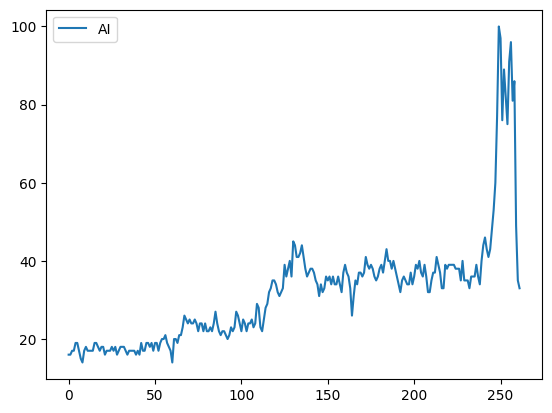

In [62]:
df.plot()

In [63]:
from statsmodels.tsa.stattools import adfuller

test_results = adfuller(df["AI"])

In [64]:
adf_statistic = test_results[0]
p_value = test_results[1]
lags_used = test_results[2]
n_observations = test_results[3]
critical_values = test_results[4]

print("--- ADF Test Results ---")
print(f"ADF Test Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Number of Lags Used: {lags_used}")
print(f"Number of Observations: {n_observations}")

print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.4f}")

print("------------------------")

# Add a clear conclusion
if p_value > 0.05:
    print(f"\nConclusion: (p-value = {p_value:.4f})")
    print("The data is NON-STATIONARY. You need to apply differencing (d=1).")
else:
    print(f"\nConclusion: (p-value = {p_value:.4f})")
    print("The data is STATIONARY. You can proceed with d=0.")

--- ADF Test Results ---
ADF Test Statistic: -0.6826
p-value: 0.8512
Number of Lags Used: 14
Number of Observations: 247

Critical Values:
  1%: -3.4571
  5%: -2.8733
  10%: -2.5730
------------------------

Conclusion: (p-value = 0.8512)
The data is NON-STATIONARY. You need to apply differencing (d=1).


In [65]:
df['First Difference'] = df['AI'] - df['AI'].shift(1)

In [66]:
df.head()

,date,AI,isPartial,First Difference
0,2020-11-01,16,False,NaN
1,2020-11-08,16,False,0.0
2,2020-11-15,17,False,1.0
3,2020-11-22,17,False,0.0
4,2020-11-29,19,False,2.0


In [67]:
test_result_1 = adfuller(df["First Difference"].dropna())

In [68]:
test_result_1

(np.float64(-6.027583969670712),
 np.float64(1.4435360272367878e-07),
 13,
 247,
 {'1%': np.float64(-3.457105309726321),
  '5%': np.float64(-2.873313676101283),
  '10%': np.float64(-2.5730443824681606)},
 np.float64(1364.3770217911067))

In [69]:
adf_statistic = test_result_1[0]
p_value = test_result_1[1]

print("--- ADF Test on First Difference (d=1) ---")
print(f"ADF Test Statistic: {adf_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print(f"\nConclusion: (p-value = {p_value:.4f})")
    print("STILL NON-STATIONARY. You need a second difference (d=2).")
else:
    print(f"\nConclusion: (p-value = {p_value:.4f})")
    print("IT IS NOW STATIONARY! Use d=1.")

--- ADF Test on First Difference (d=1) ---
ADF Test Statistic: -6.0276
p-value: 0.0000

Conclusion: (p-value = 0.0000)
IT IS NOW STATIONARY! Use d=1.


<Axes: >

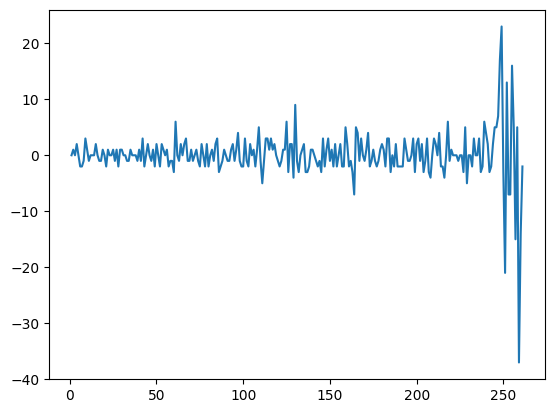

In [70]:
df["First Difference"].plot()

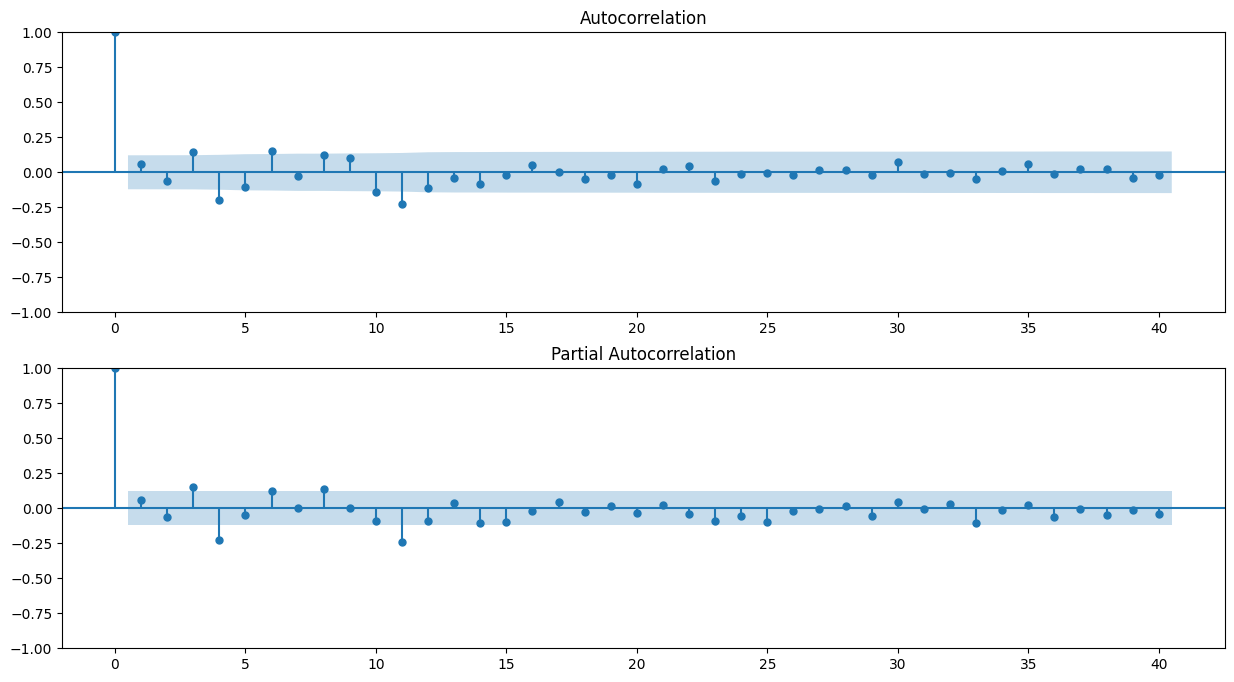

In [71]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df["First Difference"].dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df["First Difference"].dropna(), lags=40, ax=ax2)

In [72]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['AI'], order=(1,1,0))
model_fit = model.fit()

In [73]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     AI   No. Observations:                  262
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -753.575
Date:                Tue, 04 Nov 2025   AIC                           1511.149
Time:                        07:36:39   BIC                           1518.278
Sample:                             0   HQIC                          1514.015
                                - 262                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0578      0.026      2.243      0.025       0.007       0.108
sigma2        18.8522      0.445     42.366      0.000      17.980      19.724
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7385.44
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              18.90   Skew:                            -2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
# 1. Your current model (p=1, q=0)
model_p1 = ARIMA(df['AI'], order=(1,1,0))
model_fit_p1 = model_p1.fit()
print(f"AIC for ARIMA(1,1,0): {model_fit_p1.aic}")

# 2. The other main candidate (p=0, q=1)
model_q1 = ARIMA(df['AI'], order=(0,1,1))
model_fit_q1 = model_q1.fit()
print(f"AIC for ARIMA(0,1,1): {model_fit_q1.aic}")

AIC for ARIMA(1,1,0): 1511.1493021097408
AIC for ARIMA(0,1,1): 1511.0001325074259


In [75]:
# 1. Your current champion
model_q1 = ARIMA(df['AI'], order=(0,1,1))
model_fit_q1 = model_q1.fit()
print(f"AIC for ARIMA(0,1,1): {model_fit_q1.aic}")

# 2. The new 'mixed model' challenger
model_mixed = ARIMA(df['AI'], order=(1,1,1))
model_fit_mixed = model_mixed.fit()
print(f"AIC for ARIMA(1,1,1): {model_fit_mixed.aic}")

AIC for ARIMA(0,1,1): 1511.0001325074259


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC for ARIMA(1,1,1): 1507.4976534060102


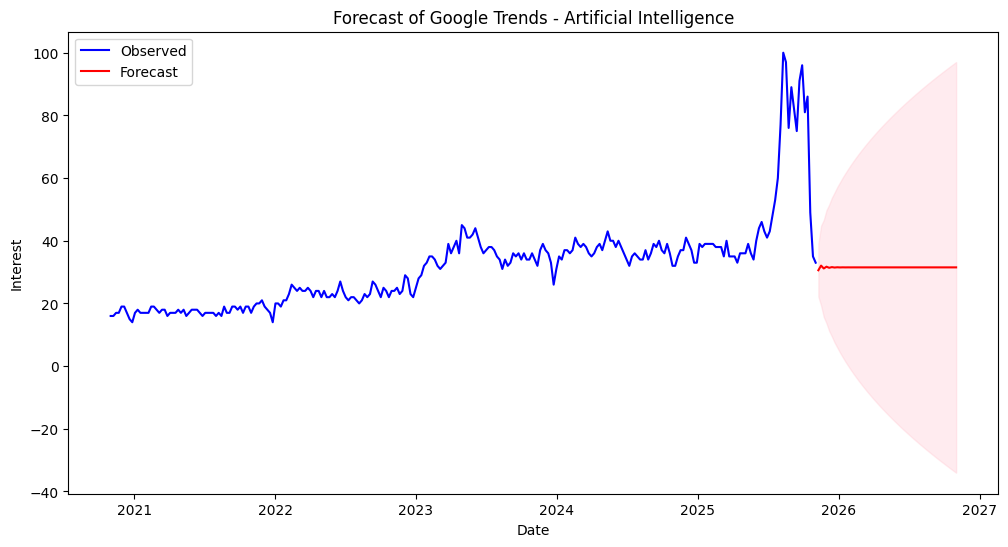

In [76]:
# Forecast next 12 months (approx. 1 year)
forecast_steps = 52  # weeks in a year
forecast = model_fit_mixed.get_forecast(steps=forecast_steps)

# Extract predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['AI'], label='Observed', color='blue')
plt.plot(pd.date_range(df['date'].iloc[-1], periods=forecast_steps+1, freq='W')[1:],
         forecast_mean, label='Forecast', color='red')
plt.fill_between(pd.date_range(df['date'].iloc[-1], periods=forecast_steps+1, freq='W')[1:],
                 forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Forecast of Google Trends - Artificial Intelligence")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

train = df['AI'][:-30]
test = df['AI'][-30:]

model = ARIMA(train, order=(1,1,1))
fit = model.fit()

forecast = fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 31.76
MAPE: 29.71%
